In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
book=pd.read_csv('book.csv',encoding='latin1')

In [3]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [7]:
book.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
book['Book.Title'].nunique()

9659

In [10]:
book['User.ID'].nunique()

2182

In [11]:
book['Book.Rating'].nunique()

10

<AxesSubplot:xlabel='Book.Rating', ylabel='count'>

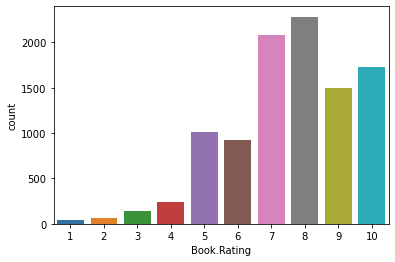

In [12]:
sns.countplot(x='Book.Rating', data=book)

More than 2k users have rated 8 then 7.Very few users have given rating from 1-5 then again more users have ratings of 9 and 10 for books 

In [13]:
book.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [14]:
b=(book['Book.Rating']>8).value_counts()

As there are many book and users are less .Iam removing books which got rating less than 8 then applying cosine similarity to know thesimilarity between users.

In [16]:
b

False    6775
True     3225
Name: Book.Rating, dtype: int64

In [17]:
book=book.dropna(how='all')

In [19]:
book.drop(book[book['Book.Rating']<8].index,inplace=True)

In [20]:
print(book.shape)

(5508, 3)


In pandas ,by deafult the pivot table takes agg function into consideration and removes the duplicates.

# Pivot table

In [21]:
user_book=book.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)

In [22]:
user_book

Book.Title,"Jason, Madison &amp",'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off","100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Ways to Make Money at Home,...,Zen in the Art of Archery (Vintage Spiritual Classics),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zombie!,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
user_book.index=book['User.ID'].unique()

In [25]:
user_book

Book.Title,"Jason, Madison &amp",'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off","100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Ways to Make Money at Home,...,Zen in the Art of Archery (Vintage Spiritual Classics),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zombie!,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons"
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
user_book.fillna(0, inplace=True)

In [27]:
user_book

Book.Title,"Jason, Madison &amp",'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off","100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Ways to Make Money at Home,...,Zen in the Art of Archery (Vintage Spiritual Classics),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zombie!,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons"
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using cosine similarity

In [28]:
#Calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [30]:
user_sim = 1 - pairwise_distances( user_book.values,metric='cosine')
#pairwise gives opposite of cosine so substracting from 1 (opposite of distance is similarity)

In [31]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
#converting result into dataframe
user_sim_df = pd.DataFrame(user_sim)

In [33]:
user_sim_df.index = book['User.ID'].unique()
user_sim_df.columns = book['User.ID'].unique()

In [34]:
user_sim_df.iloc[0:5, 0:5]

,276736,276745,276747,276751,276754
276736,1.0,0.0,0.0,0.0,0.0
276745,0.0,1.0,0.0,0.0,0.0
276747,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,1.0


In [35]:
#We only need off diagonal values
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276736,276745,276747,276751,276754
276736,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0


In [37]:
user_sim_df.idxmax(axis=1)[0:5]
#similar users

276736    276736
276745    276736
276747    276736
276751    276736
276754    276736
dtype: int64

In [38]:
book[(book['User.ID']==276747) | (book['User.ID']==276736)]

,User.ID,Book.Title,Book.Rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8


In [40]:
user_1=book[book['User.ID']==276747]

In [41]:
user_2=book[book['User.ID']==276736]

In [43]:
user_2['Book.Title']

3    Flu: The Story of the Great Influenza Pandemic...
Name: Book.Title, dtype: object

In [45]:
user_1['Book.Title']

7                                      PLEADING GUILTY
8    Under the Black Flag: The Romance and the Real...
9              Where You'll Find Me: And Other Stories
Name: Book.Title, dtype: object

In [47]:
pd.merge(user_1,user_2,on='Book.Title',how='outer')

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,276747.0,PLEADING GUILTY,9.0,NaN,NaN
1,276747.0,Under the Black Flag: The Romance and the Real...,9.0,NaN,NaN
2,276747.0,Where You'll Find Me: And Other Stories,8.0,NaN,NaN
3,NaN,Flu: The Story of the Great Influenza Pandemic...,NaN,276736.0,8.0
